# Step 0: Imports and Reading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('max_columns', 200)

In [2]:
df = pd.read_csv('../input/rollercoaster-database/coaster_db.csv')

# Step 1 : Data understanding

* DataFrame shape
* head and tail
* dtypes
* describe

In [3]:
df.shape

(1087, 56)

In [6]:
df.head(5)

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [7]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [8]:
df.dtypes

coaster_name                      object
Length                            object
Speed                             object
Location                          object
Status                            object
Opening date                      object
Type                              object
Manufacturer                      object
Height restriction                object
Model                             object
Height                            object
Inversions                       float64
Lift/launch system                object
Cost                              object
Trains                            object
Park section                      object
Duration                          object
Capacity                          object
G-force                           object
Designer                          object
Max vertical angle                object
Drop                              object
Soft opening date                 object
Fast Lane available               object
Replaced        

In [9]:
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


# Step 2: Data Preparation
* Dropping irrelevant columns and rows
* Identifying duplical columns
* Renaming columns
* Feature creation

In [16]:
df = df[['coaster_name', 
     #'Length', 'Speed', 
     'Location', 'Status', 
     #'Opening date',
     # 'Type', 
     'Manufacturer', 
     #'Height restriction', 'Model', 'Height',
     #  'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
     #  'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
     #  'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
     # 'Track layout', 'Fastrack available', 'Soft opening date.1',
     # 'Closing date',
     #'Opened',
     #'Replaced by', 'Website',
    #   'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
    #  'Single rider line available', 'Restraint Style',
    #   'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 
       'latitude', 'longitude',
       'Type_Main',
       'opening_date_clean', 
     #'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 
     #'height_value', 'height_unit', 
     'height_ft',
       'Inversions_clean', 'Gforce_clean']].copy()

In [19]:
df['opening_date_clean'] = pd.to_datetime(df['opening_date_clean'])

0      1884-06-16
1      1895-01-01
2             NaT
3      1901-01-01
4      1901-01-01
          ...    
1082          NaT
1083   2022-01-01
1084   2016-06-16
1085          NaT
1086   2022-01-01
Name: opening_date_clean, Length: 1087, dtype: datetime64[ns]

In [21]:
# Rename our columns
df = df.rename(columns={'coaster_name' : 'Coaster_Name',
                  'year_introduced': 'Year_Introduced',
                  'height_ft' : 'Height_ft'})

In [22]:
df.head()

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,Height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


# Step 3: Feature Understanding
*(univariate analysis)*

* Plotting Feature Distributions
   * Histogram
   * KDE
   * Boxplot   

Text(0, 0.5, 'Count')

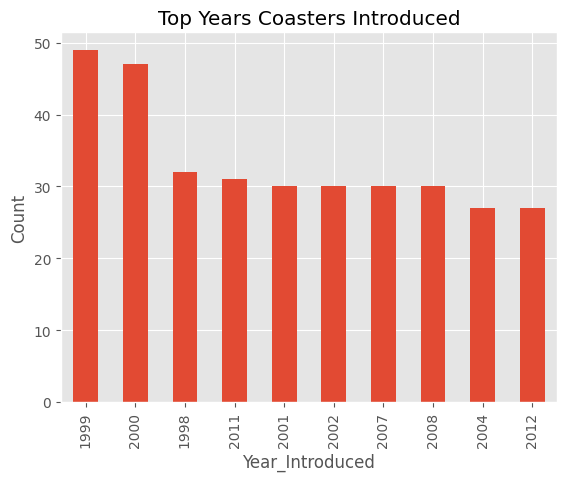

In [28]:
ax =df['Year_Introduced'].value_counts() \
.head(10) \
.plot(kind='bar', title='Top Years Coasters Introduced')
ax.set_xlabel('Year_Introduced')
ax.set_ylabel('Count')

Text(0.5, 28.265624999999986, 'Speed (mph)')

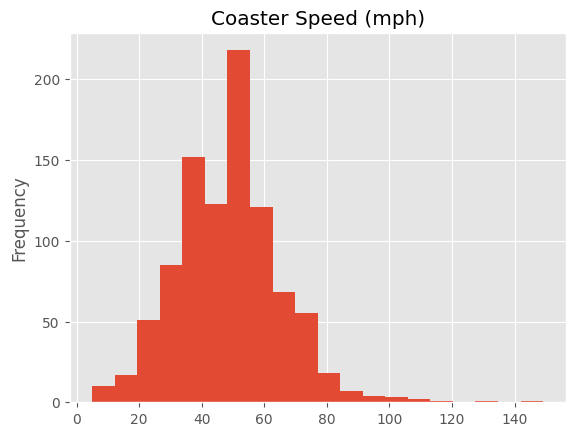

In [31]:
df['speed_mph'].plot(kind='hist', bins=20, 
                     title='Coaster Speed (mph)')
ax.set_xlabel('Speed (mph)')

Text(0.5, 28.265624999999986, 'Speed (mph)')

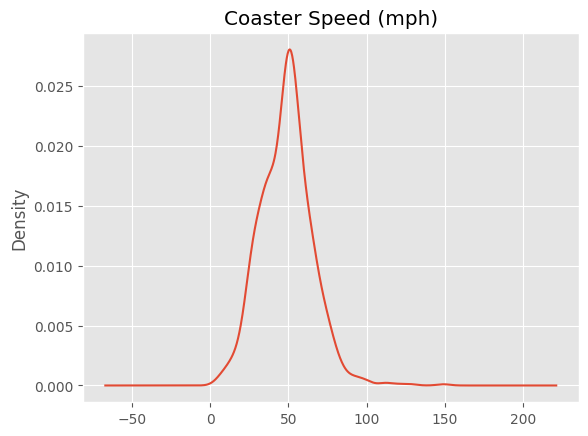

In [33]:
df['speed_mph'].plot(kind='kde', 
                     title='Coaster Speed (mph)')
ax.set_xlabel('Speed (mph)')

# Step 4: Feature Relationship
 
* Scatterplot
* Heatmap Correlation
* Pairplot
* Groupby comparisons

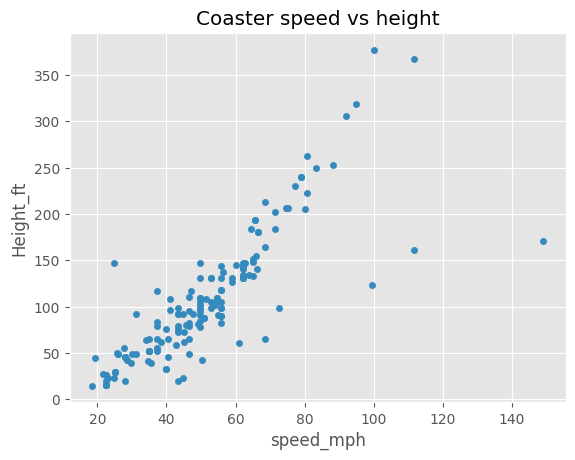

In [37]:
df.plot(kind='scatter', 
        x='speed_mph',
        y='Height_ft',
        title='Coaster speed vs height')
plt.show()

<Axes: xlabel='speed_mph', ylabel='Height_ft'>

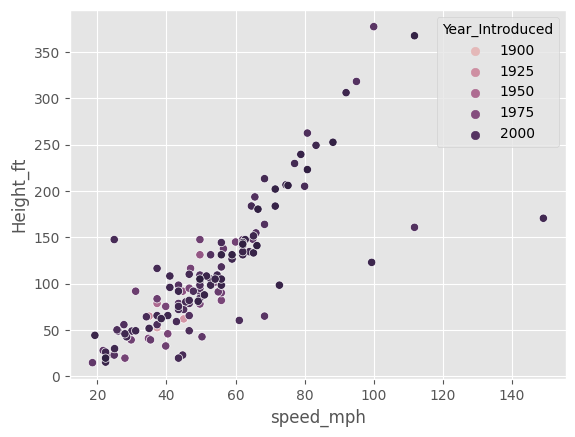

In [39]:
sns.scatterplot(x='speed_mph',
        y='Height_ft',
                hue='Year_Introduced',
         data=df)

In [41]:
df.columns

Index(['Coaster_Name', 'Location', 'Status', 'Manufacturer', 'Year_Introduced',
       'latitude', 'longitude', 'Type_Main', 'opening_date_clean', 'speed_mph',
       'Height_ft', 'Inversions_clean', 'Gforce_clean'],
      dtype='object')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

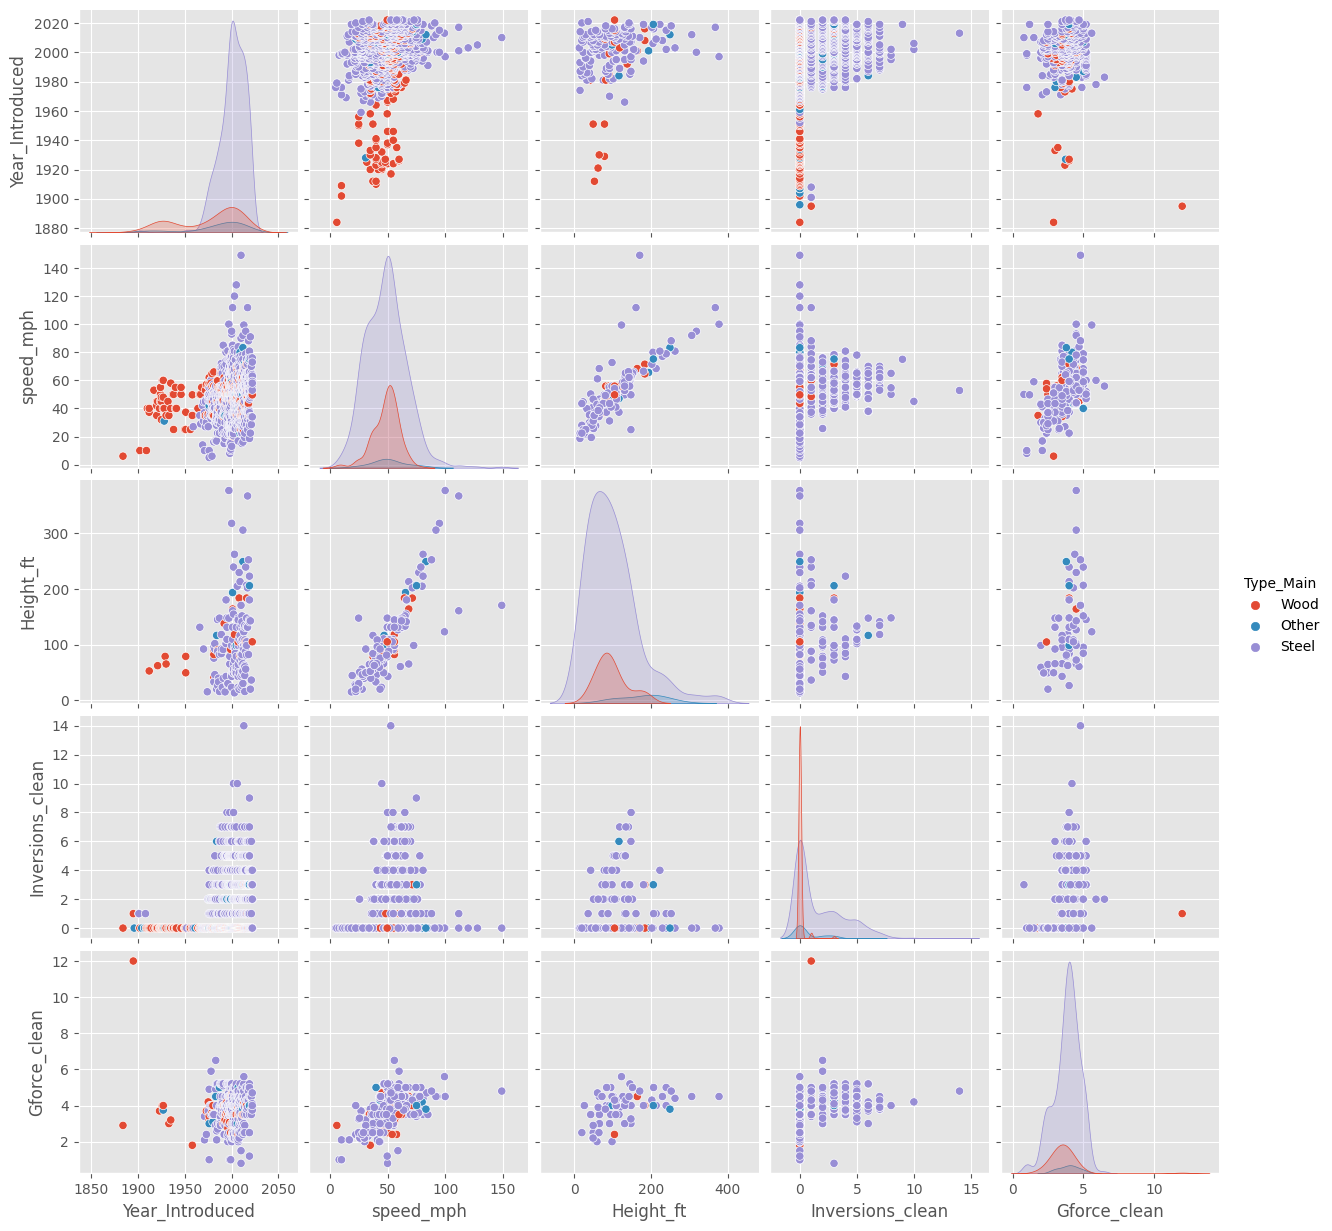

In [46]:
sns.pairplot(df, 
              vars=['Year_Introduced','speed_mph',
                       'Height_ft', 'Inversions_clean', 'Gforce_clean'],
             hue= 'Type_Main' )
plt.show()

In [49]:
df_corr = df[['Year_Introduced','speed_mph',
    'Height_ft', 'Inversions_clean', 'Gforce_clean']].dropna().corr()
df_corr

,Year_Introduced,speed_mph,Height_ft,Inversions_clean,Gforce_clean
Year_Introduced,1.000000,0.178619,0.145457,-0.172829,0.168763
speed_mph,0.178619,1.000000,0.734499,-0.026413,0.605090
Height_ft,0.145457,0.734499,1.000000,-0.076255,0.460841
Inversions_clean,-0.172829,-0.026413,-0.076255,1.000000,0.270942
Gforce_clean,0.168763,0.605090,0.460841,0.270942,1.000000


<Axes: >

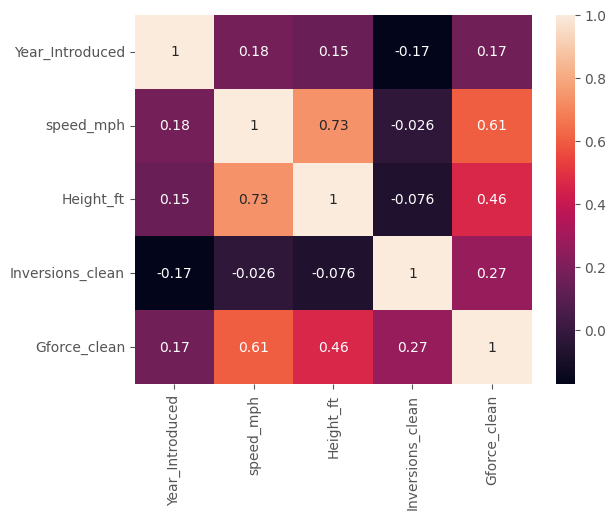

In [51]:
sns.heatmap(df_corr, annot=True)

# Step 5: Ask a Questions about the Data

* Try to answer a question you have about the data using a plot or statistic.

What are the locations with the fastest roller coasters (minimum of 10)?

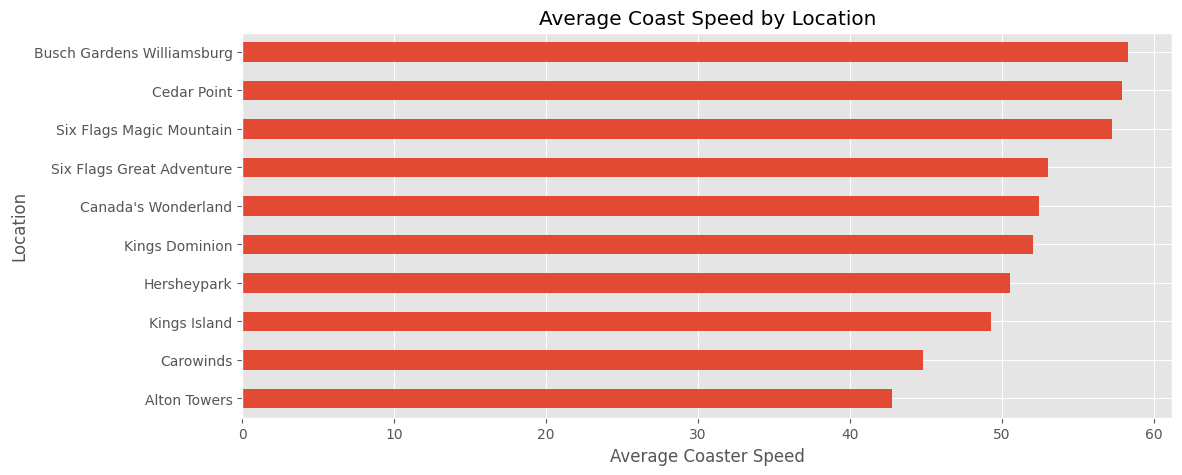

In [65]:
ax = df.query('Location != "Other"') \
    .groupby('Location')['speed_mph'] \
    .agg(['mean','count']) \
    .query('count >= 10') \
    .sort_values('mean')['mean'] \
    .plot(kind='barh', figsize=(12, 5), title='Average Coast Speed by Location')
ax.set_xlabel('Average Coaster Speed')
plt.show()
